Reference URL
https://github.com/dpeerlab/SEACells/blob/main/notebooks/SEACell_COVID_integration.ipynb

In [3]:
!conda info --envs

# conda environments:
#
                         /Users/titai/Library/r-miniconda
                         /Users/titai/Library/r-miniconda/envs/r-reticulate
base                     /Users/titai/miniconda3
annovar                  /Users/titai/miniconda3/envs/annovar
bs                       /Users/titai/miniconda3/envs/bs
celloracle_py3.9.16      /Users/titai/miniconda3/envs/celloracle_py3.9.16
pcpp                     /Users/titai/miniconda3/envs/pcpp
pyscenic              *  /Users/titai/miniconda3/envs/pyscenic
scvi                     /Users/titai/miniconda3/envs/scvi
seacells                 /Users/titai/miniconda3/envs/seacells



In [1]:
import scanpy as sc
import numpy as np
import pandas as pd 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
adata = sc.read_h5ad("hgsoc_with_SEACell_ID.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 118173 × 35019
    obs: 'cell_id', 'sample_id', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'GSE_ID', 'First_Author', 'Journal', 'Year', 'GSE_ID_with_numbers', 'GSM_ID', 'adata.obs.', 'patient_description_in_GSE', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'Cell', 'cell_type', 'n_counts', 'SEACell', 'GSM_ID_string', 'SEACell_string', 'SEACell_ID'
    obsm: 'X_pca', 'X_umap'

In [4]:
adata.obs['GSM_ID'].unique()

['GSM4568674', 'GSM4568675', 'GSM4568676', 'GSM4568677', 'GSM4568678', ..., 'GSM6049627', 'GSM6049628', 'GSM6049629', 'GSM6049630', 'GSM6049631']
Length: 31
Categories (31, object): ['GSM4568674', 'GSM4568675', 'GSM4568676', 'GSM4568677', ..., 'GSM6049628', 'GSM6049629', 'GSM6049630', 'GSM6049631']

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key='GSM_ID', n_top_genes=2500, inplace=True)

sc.tl.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


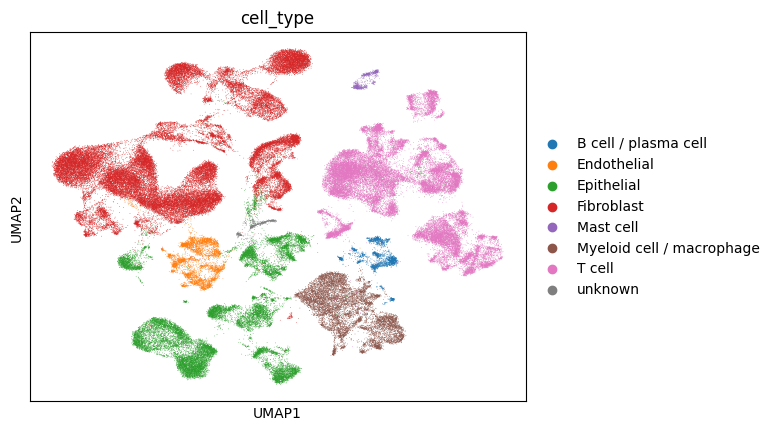

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


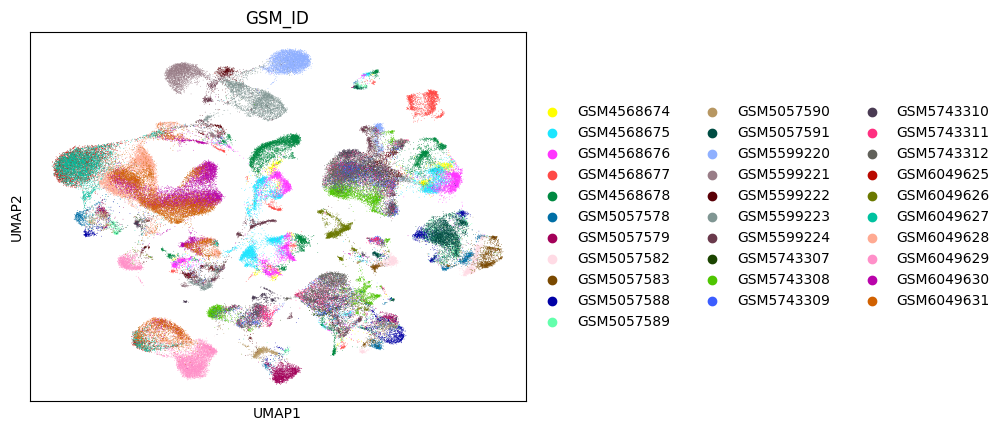

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


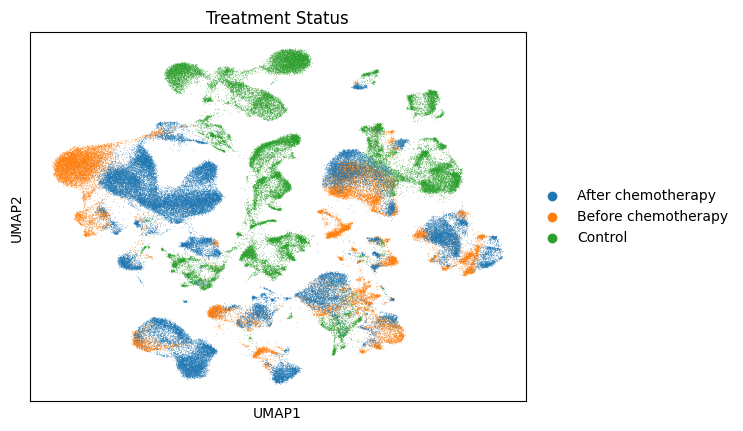

In [6]:
sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'GSM_ID')
sc.pl.umap(adata, color = 'Treatment Status')

In [7]:
cell_id = adata.obs[['GSE_ID', 'GSM_ID',
                     'Treatment Status', 'Clinical stage', 'Clinical stage (Major)',
                     "cell_type", "SEACell_ID"]]

In [8]:
cell_id = cell_id.drop_duplicates()

In [9]:
count = []

for x in range(2865):
    count.append(sum(cell_id.SEACell_ID == cell_id.SEACell_ID[x]))

In [10]:
cell_id["count"] = count

In [11]:
cell_id_unique = cell_id[cell_id["count"] == 1]

# Summarize patients by SEACell

In [12]:
from SEACells.core import summarize_by_SEACell

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [13]:
ad = summarize_by_SEACell(adata, SEACells_label='SEACell_ID')

100%|██████████████████████████████████████| 2325/2325 [00:14<00:00, 165.03it/s]


In [14]:
ad.layers["raw"] = ad.X

In [15]:
ad.obs["SEACell_ID"] = ad.obs.index

In [16]:
ad_unique = ad[ad.obs["SEACell_ID"].isin(cell_id_unique["SEACell_ID"])]

In [17]:
ad_unique

View of AnnData object with n_obs × n_vars = 1921 × 35019
    obs: 'SEACell_ID'
    layers: 'raw'

In [18]:
ad_unique.obs = ad_unique.obs.reset_index(drop=True)

In [19]:
ad_unique.obs = ad_unique.obs.merge(cell_id_unique, on = "SEACell_ID", how="inner")

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [20]:
ad_unique.obs.index = ad_unique.obs["SEACell_ID"]

In [21]:
ad_unique.obs.index.name = None

In [22]:
ad_unique.obs.columns

Index(['SEACell_ID', 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage',
       'Clinical stage (Major)', 'cell_type', 'count'],
      dtype='object')

In [23]:
ad_unique.obs = ad_unique.obs[['GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage',
       'Clinical stage (Major)', 'cell_type']]

In [24]:
ad_unique

AnnData object with n_obs × n_vars = 1921 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    layers: 'raw'

In [25]:
ad = ad_unique

In [26]:
ad

AnnData object with n_obs × n_vars = 1921 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    layers: 'raw'

In [27]:
ad.layers["raw"]

<1921x35019 sparse matrix of type '<class 'numpy.float64'>'
	with 18707999 stored elements in Compressed Sparse Row format>

In [28]:
ad.X

<1921x35019 sparse matrix of type '<class 'numpy.float64'>'
	with 18707999 stored elements in Compressed Sparse Row format>

In [29]:
dense = ad.layers["raw"].toarray()

In [30]:
np.amax(dense)

383705.0

In [31]:
ad

AnnData object with n_obs × n_vars = 1921 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    layers: 'raw'

In [32]:
sc.pp.normalize_total(ad)
sc.pp.log1p(ad)
sc.pp.highly_variable_genes(ad, batch_key='GSM_ID', n_top_genes=2500, inplace=True)

sc.tl.pca(ad, use_highly_variable=True)
sc.pp.neighbors(ad, use_rep='X_pca')
sc.tl.umap(ad)

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


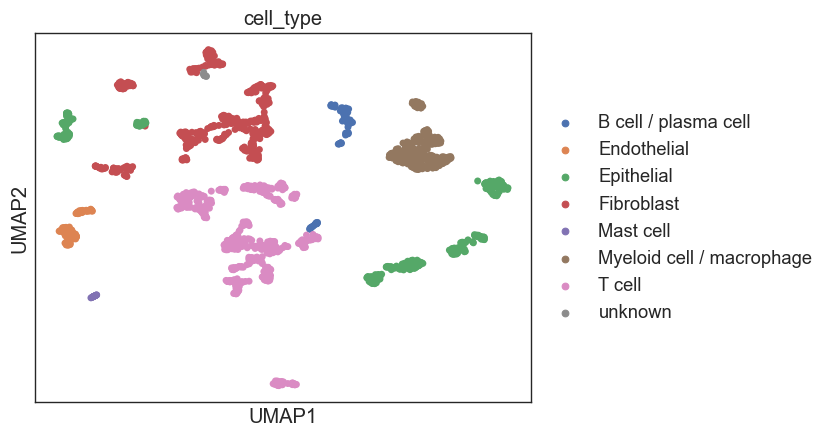

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


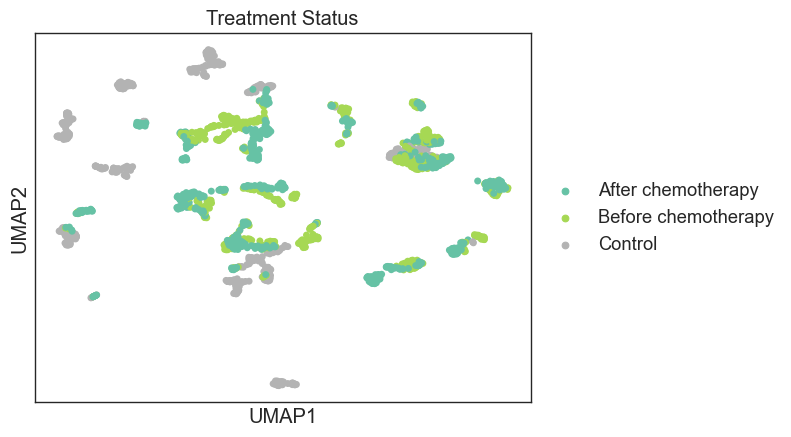

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


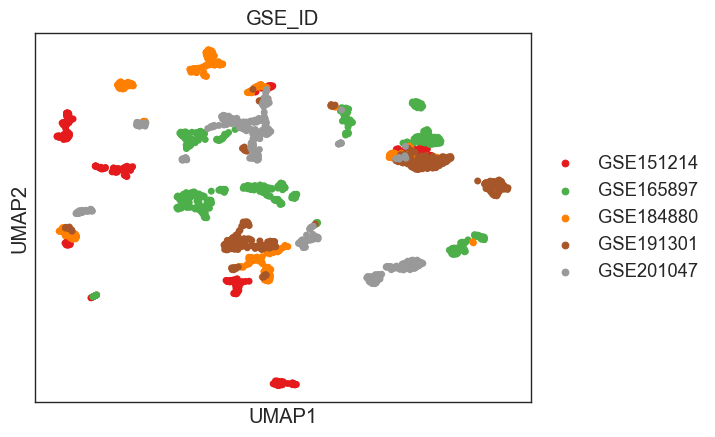

In [33]:
# Specify a different font
font = {'family' : 'Arial', 'size' : 12}
plt.rc('font', **font)

%matplotlib inline
sc.pl.umap(ad, color='cell_type', s=100)
sc.pl.umap(ad, color='Treatment Status', palette='Set2', s=100)
sc.pl.umap(ad, color='GSE_ID', palette='Set1', s=100)

In [34]:
# Perform batch correction to account for differences between samples.
sc.external.pp.harmony_integrate(ad, 'GSM_ID')

2023-07-19 10:45:58,079 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-19 10:45:58,869 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-19 10:45:58,881 - harmonypy - INFO - Iteration 1 of 10
2023-07-19 10:45:59,273 - harmonypy - INFO - Iteration 2 of 10
2023-07-19 10:45:59,580 - harmonypy - INFO - Iteration 3 of 10
2023-07-19 10:45:59,910 - harmonypy - INFO - Iteration 4 of 10
2023-07-19 10:46:00,201 - harmonypy - INFO - Iteration 5 of 10
2023-07-19 10:46:00,509 - harmonypy - INFO - Iteration 6 of 10
2023-07-19 10:46:00,743 - harmonypy - INFO - Iteration 7 of 10
2023-07-19 10:46:00,937 - harmonypy - INFO - Converged after 7 iterations


In [35]:
!pip install harmonypy

In [36]:
sc.pp.neighbors(ad, use_rep='X_pca_harmony')
sc.tl.umap(ad)

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


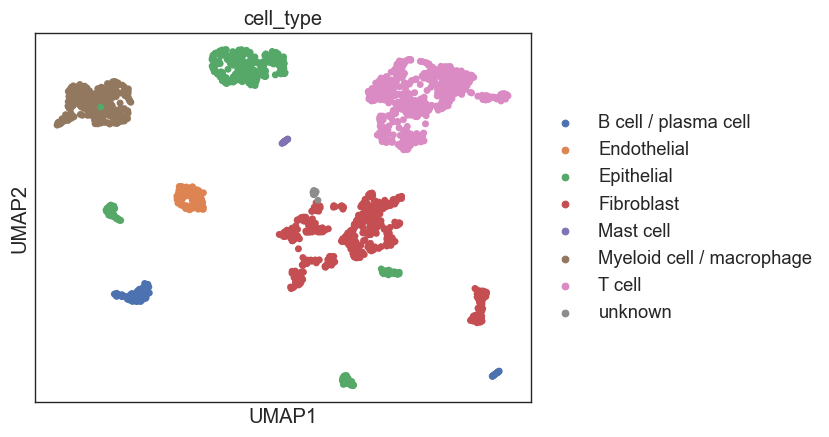

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


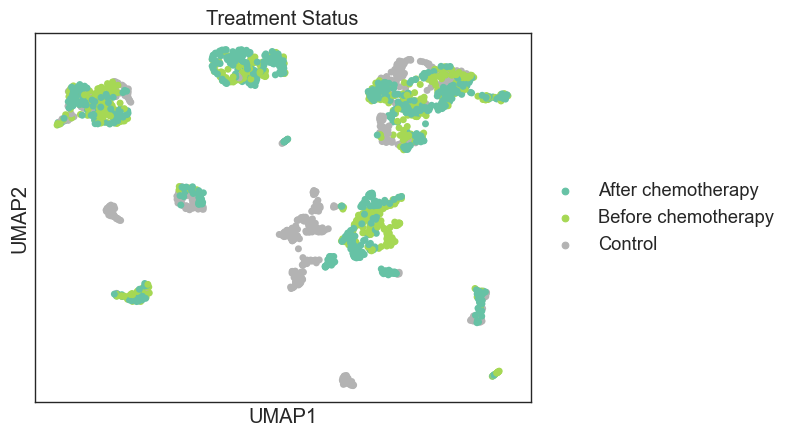

/Users/titai/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


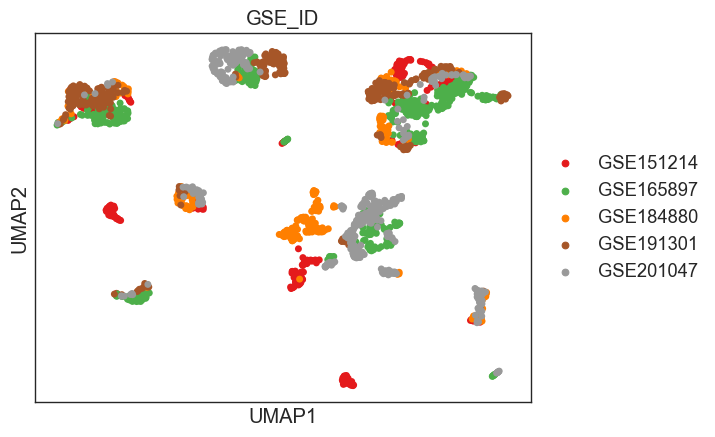

In [37]:
# Specify a different font
font = {'family' : 'Arial', 'size' : 12}
plt.rc('font', **font)

%matplotlib inline
sc.pl.umap(ad, color='cell_type', s=100)
sc.pl.umap(ad, color='Treatment Status', palette='Set2', s=100)
sc.pl.umap(ad, color='GSE_ID', palette='Set1', s=100)

In [38]:
ad

AnnData object with n_obs × n_vars = 1921 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'Treatment Status_colors', 'GSE_ID_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

In [39]:
ad.X

<1921x35019 sparse matrix of type '<class 'numpy.float64'>'
	with 18707999 stored elements in Compressed Sparse Row format>

In [40]:
ad.layers["raw"]

<1921x35019 sparse matrix of type '<class 'numpy.float64'>'
	with 18707999 stored elements in Compressed Sparse Row format>

In [41]:
dense = ad.X.toarray()

In [42]:
np.amax(dense)

11.664331145584223

In [43]:
ad.write_h5ad("hgsoc_metacells.h5ad")

In [45]:
patient_1 = ad[ad.obs['GSM_ID'].isin(["GSM5057579", "GSM5057578"])]

In [47]:
patient_1.write_h5ad("patient_1_metacells.h5ad")

In [48]:
patient_2 = ad[ad.obs['GSM_ID'].isin(["GSM5057583", "GSM5057582"])]

In [49]:
patient_2.obs["GSM_ID"].unique()

['GSM5057582', 'GSM5057583']
Categories (2, object): ['GSM5057582', 'GSM5057583']

In [50]:
patient_2.write_h5ad("patient_2_metacells.h5ad")

In [51]:
patient_3 = ad[ad.obs['GSM_ID'].isin(["GSM5057589", "GSM5057588"])]

In [52]:
patient_3.obs["GSM_ID"].unique()

['GSM5057588', 'GSM5057589']
Categories (2, object): ['GSM5057588', 'GSM5057589']

In [53]:
patient_3.write_h5ad("patient_3_metacells.h5ad")

In [54]:
patient_4 = ad[ad.obs['GSM_ID'].isin(["GSM5057591", "GSM5057590"])]

In [55]:
patient_4.obs["GSM_ID"].unique()

['GSM5057590', 'GSM5057591']
Categories (2, object): ['GSM5057590', 'GSM5057591']

In [56]:
patient_4.write_h5ad("patient_4_metacells.h5ad")

In [62]:
patient_5 = ad[ad.obs['GSE_ID'].isin(["GSE191301"])]

In [63]:
patient_5.obs["GSM_ID"].unique()

['GSM5743307', 'GSM5743308', 'GSM5743309', 'GSM5743310', 'GSM5743311', 'GSM5743312']
Categories (6, object): ['GSM5743307', 'GSM5743308', 'GSM5743309', 'GSM5743310', 'GSM5743311', 'GSM5743312']

In [64]:
patient_5.write_h5ad("patient_5_metacells.h5ad")

In [65]:
patient_6 = ad[ad.obs['GSE_ID'].isin(["GSE201047"])]

In [66]:
patient_6.obs["GSM_ID"].unique()

['GSM6049625', 'GSM6049626', 'GSM6049627', 'GSM6049628', 'GSM6049629', 'GSM6049630', 'GSM6049631']
Categories (7, object): ['GSM6049625', 'GSM6049626', 'GSM6049627', 'GSM6049628', 'GSM6049629', 'GSM6049630', 'GSM6049631']

In [67]:
patient_6.write_h5ad("patient_6_metacells.h5ad")

In [69]:
print(patient_1)
print(patient_2)
print(patient_3)
print(patient_4)
print(patient_5)
print(patient_6)

View of AnnData object with n_obs × n_vars = 138 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'Treatment Status_colors', 'GSE_ID_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'
View of AnnData object with n_obs × n_vars = 134 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'Treatment Status_colors', 'GSE_ID_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
  

In [71]:
ad.obs['cell_type'].unique()

['T cell', 'Epithelial', 'Endothelial', 'Myeloid cell / macrophage', 'Fibroblast', 'Mast cell', 'B cell / plasma cell', 'unknown']
Categories (8, object): ['B cell / plasma cell', 'Endothelial', 'Epithelial', 'Fibroblast', 'Mast cell', 'Myeloid cell / macrophage', 'T cell', 'unknown']

In [ ]:
patient_1 = ad[ad.obs['GSM_ID'].isin(["GSM5057579", "GSM5057578"])]
patient_1.write_h5ad("patient_1_metacells.h5ad")

In [83]:
cell_type = ['T cell', 'Epithelial', 'Endothelial', 'Myeloid cell / macrophage', 'Fibroblast', 'Mast cell', 'B cell / plasma cell']
cell_type_name = ['T_cell', 
                  'Epithelial', 
                  'Endothelial', 
                  'Myeloid_macrophage', 
                  'Fibroblast', 
                  'Mast_cell', 
                  'B_cell_plasma_cell']
cell_type_file_name = ['T_cell', 
                  'Epithelial', 
                  'Endothelial', 
                  'Myeloid_macrophage', 
                  'Fibroblast', 
                  'Mast_cell', 
                  'B_cell_plasma_cell']

In [82]:
for n in range(len(cell_type)):
    print(f"{cell_type_name[n]}_metacells.h5ad")

T_cell_metacells.h5ad
Epithelial_metacells.h5ad
Endothelial_metacells.h5ad
Myeloid_macrophage_metacells.h5ad
Fibroblast_metacells.h5ad
Mast_cell_metacells.h5ad
B_cell_plasma_cell_metacells.h5ad


In [84]:
for n in range(len(cell_type)):
    cell_type_name[n] = ad[ad.obs['cell_type'] == cell_type[n]]
    cell_type_name[n].write_h5ad(f"{cell_type_file_name[n]}_metacells.h5ad")
    print(cell_type_name[n])

View of AnnData object with n_obs × n_vars = 581 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'Treatment Status_colors', 'GSE_ID_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'
View of AnnData object with n_obs × n_vars = 343 × 35019
    obs: 'GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'Treatment Status_colors', 'GSE_ID_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
  